In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,9/25/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# A. Thu thập dữ liệu

* Ngữ cảnh:
    * Netflix là một trong những nền tảng truyền thông phương tiện và phát trực tuyến lớn nhất, với hơn 8000 phim và chương trình truyền hình, và cùng với 260 triệu người đăng ký.

    * Để tìm hiểu thêm về Netflix, cũng như dữ liệu về nội dung mà nền tảng này cung cấp, từ đó hiểu rõ hơn về định hướng của nền tảng, nhóm đã quyết định chọn bộ dữ liệu này để phân tích.

* Bộ dữ liệu:
    * Chủ đề: Phim và chương trình truyền hình của Netflix.
    * Nguồn: https://www.kaggle.com/datasets/shivamb/netflix-shows

* License:
    * CC0: Hoàn toàn có được sự cho phép để copy, chỉnh sửa, phân loại và thực hiện các công việc mà không cần phải xin giấy phép.

* Cách thức thu thập dữ liệu:
    * Nguồn thu thập: cố định trên nền tảng Netflix
    * Sử dụng cách gọi API để thu thập các dữ liệu trên nền tảng

# B. Khám phá dữ liệu

In [42]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  8807
Number of columns:  12


* Bộ dữ liệu có tổng cộng 8807 dòng, mỗi dòng đều có đúng 1 ý nghĩa, đó là thể hiện dữ liệu liên quan đến 1 bộ phim hoặc chương trình truyền hình cụ thể

* Bộ dữ liệu có 12 cột:
    * `show_id`: chứa các giá trị id duy nhất cho một bộ phim/chương trình truyền hình
    * `type`: thể loại của bộ phim/chương trình truyền hình
    * `title`: tên của bộ phim/chương trình truyền hình
    * `director`: tên của đạo diễn 
    * `cast`: các diễn viên tham gia bộ phim/chương trình truyền hình
    * `country`: quốc gia mà bộ phim/chương trình truyền hình được sản xuất
    * `date_added`: ngày được thêm vào Netflix
    * `release_year`: năm phát hành của bộ phim/chương trình truyền hình
    * `rating`: đánh giá độ tuổi được phép xem của bộ phim/chương trình truyền hình
    * `duration`: tổng thời lượng phát sóng
    * `listed_in`: các thể loại
    * `description`: mô tả nội dung

In [43]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


* Kiểu dữ liệu của từng cột
    * `show_id`: object
    * `type`: object
    * `title`: object
    * `director`: object
    * `cast`: object
    * `country`: object
    * `date_added`: object
    * `release_year`: int
    * `rating`: object
    * `duration`: object
    * `listed_in`: object
    * `description`: object

* Sau quá trình kiểm tra các giá trị của các cột trên thì ta nên xử lý cột `date_added`, chuyển dữ liệu từ object sang datetime

In [44]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [45]:
print('Show id: ', df['show_id'].unique())
print('Total unique value: ', df['show_id'].nunique())

Show id:  ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
Total unique value:  8807


In [46]:
print('Type: ', df['type'].unique())
print('Total unique value: ', df['type'].nunique())

Type:  ['Movie' 'TV Show']
Total unique value:  2


In [47]:
print('Title: ', df['title'].unique())
print('Total unique value: ', df['title'].nunique())

Title:  ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
Total unique value:  8804


In [48]:
print('Director: ', df['director'].unique())
print('Total unique value: ', df['director'].nunique())

Director:  ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
Total unique value:  4528


In [49]:
print('Cast: ', df['cast'].unique())
print('Total unique value: ', df['cast'].nunique())

Cast:  [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy']
Total unique value:  7692


In [50]:
print('Country: ', df['country'].unique())
print('Total unique value: ', df['country'].nunique())

Country:  ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United

In [51]:
print('Date added from: ', df['date_added'].min())
print('To: ', df['date_added'].max())

Date added from:  2008-01-01 00:00:00
To:  2021-09-25 00:00:00


In [52]:
print('Release year from: ', df['release_year'].min())
print('To: ', df['release_year'].max())

Release year from:  1925
To:  2021


In [53]:
print('Rating: ', df['rating'].unique())
print('Total unique value: ', df['rating'].nunique())

Rating:  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
Total unique value:  17


In [54]:
print('Duration: ', df['duration'].unique())
print('Total unique value: ', df['duration'].nunique())

Duration:  ['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 

In [55]:
print('Listed in: ', df['listed_in'].unique())
print('Total unique value: ', df['listed_in'].nunique())

Listed in:  ['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International Movi

In [56]:
print('Description: ', df['description'].unique())
print('Total unique value: ', df['description'].nunique())

Description:  ['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'
 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'
 'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'
 ...
 'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.'
 'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.'
 "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."]
Total unique value:  8775


* Với mỗi cột, các giá trị được phân bố như sau:
    * `show_id`: 8807 giá trị id duy nhất
    * `type`: chỉ có 2 giá trị: `Movie` và `TV Show`
    * `title`: 8807 tên khác nhau
    * `director`: có 30% hàng không có giá trị, còn lại sẽ có 4528 cái tên phân biệt
    * `cast`: có 9% hàng không có giá trị, còn lại sẽ có 7692 cái tên phân biệt
    * `country`: tên các quốc gia sản xuất
    * `date_added`: bao gồm các giá trị ngày tháng năm trong khoảng từ 01-01-2008 đến 25-09-2021
    * `release_year`: bao gồm các giá trị số từ 1925 đến 2021
    * `rating`: bao gồm các giá trị nhãn, gồm 17 nhãn khác nhau
    * `duration`: thời lượng phát sóng được tính bằng số phút, hoặc tính theo mùa
    * `listed_in`: gồm 514 thể loại khác nhau
    * `description`: các chuỗi mô tả

* Đối với bộ dữ liệu trên thì việc tiền xử lý là không cần thiết, không có cột nào có quá nhiều hàng không có giá trị, chỉ duy nhất là cột director (30%), tuy nhiên vẫn có thể chấp nhận được.

# C. Khám phá mối quan hệ trong dữ liệu

### Movie type

#### a) Lý do chọn biểu đồ

đang làm

#### b) Biểu đồ

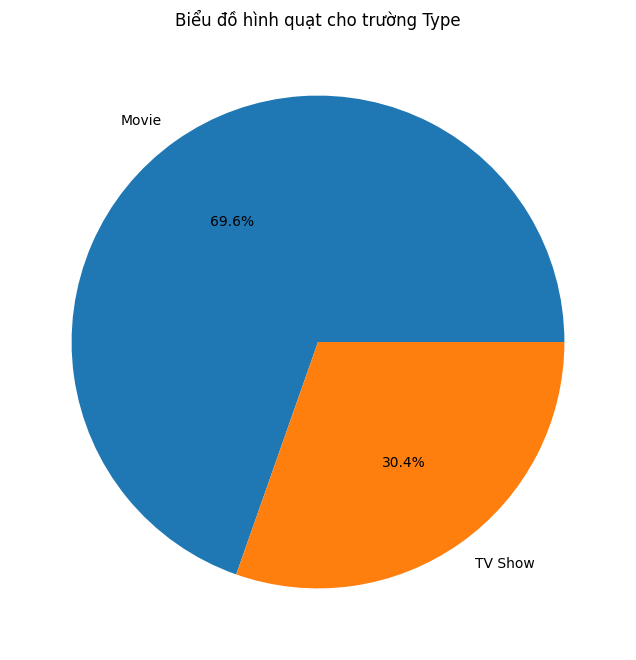

In [57]:
# Tính toán số lượng mỗi loại
type_counts = df['type'].value_counts()

# Vẽ biểu đồ hình quạt
plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Biểu đồ hình quạt cho trường Type')
plt.show()


### Release Year

#### a) Lý do chọn biểu đồ

đang làm

#### b) Biểu đồ

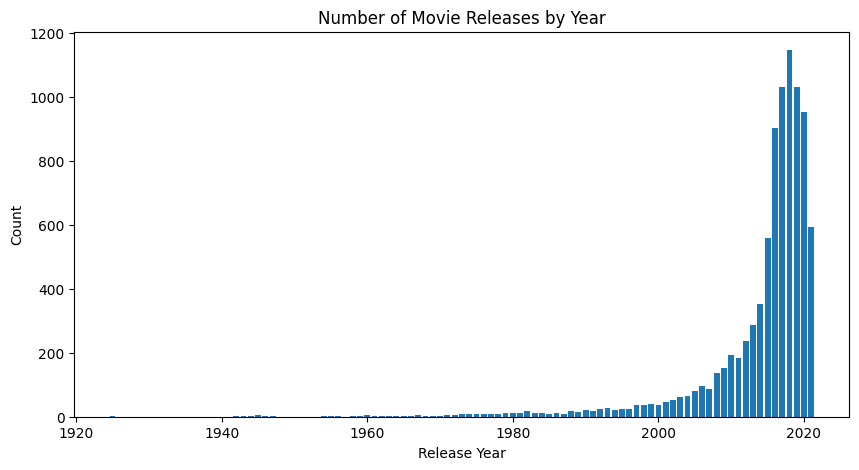

In [58]:
# Tính số lượng phát hành theo năm
release_counts = df['release_year'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,5))
plt.bar(release_counts.index, release_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movie Releases by Year')
plt.show()


### Country

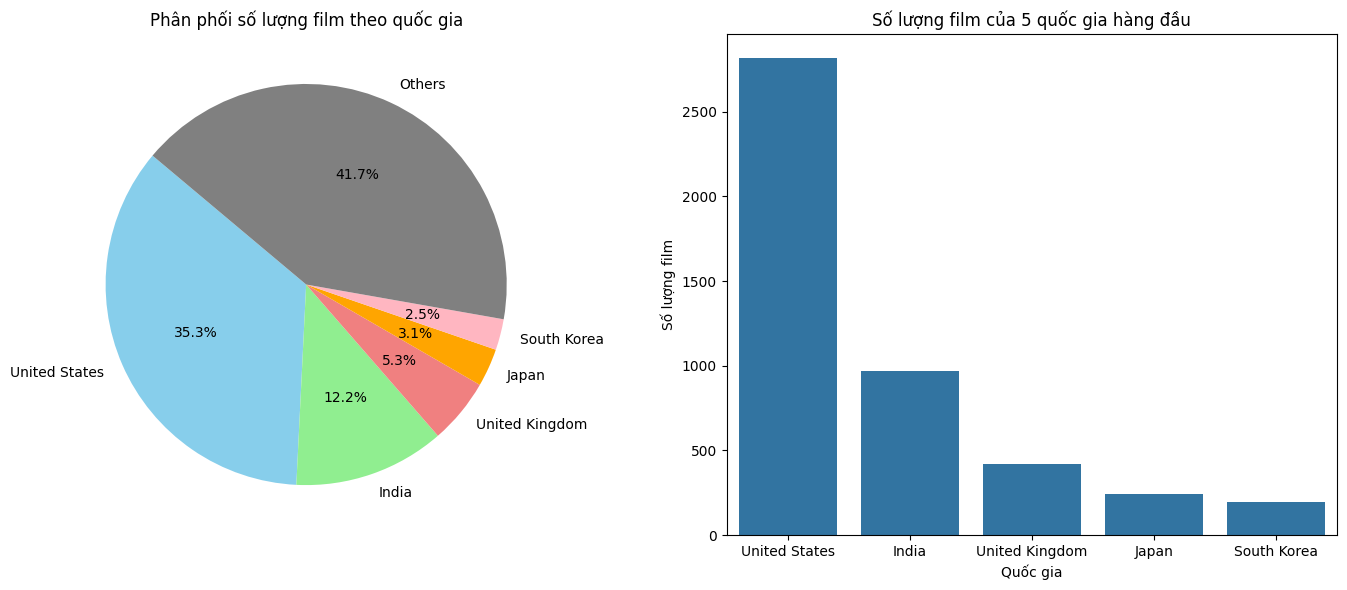

In [68]:
# Đếm số lượng film ở mỗi quốc gia
country_count = df["country"].value_counts()
top_countries = country_count.head(5)
other_countries_count = country_count[5:].sum()
top_and_others = pd.concat([top_countries, pd.Series(other_countries_count, index=['Others'])])

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Pie chart
axes[0].pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'grey'])
axes[0].set_title("Phần trăm số lượng film theo quốc gia")

# Countplot
sns.countplot(x='country', data=df, order=country_count.index[:5], ax=axes[1])
axes[1].set_xlabel("Quốc gia")
axes[1].set_ylabel("Số lượng film")
axes[1].set_title("Số lượng film của 5 quốc gia hàng đầu")

# Adjust layout
plt.tight_layout()
plt.show()


### Lí do chọn biểu đồ: 
- Pie chart là một lựa chọn phù hợp vì chúng ta quan tâm đến phân phối phần trăm của số lượng bộ phim ở mỗi quốc gia so với tổng số lượng bộ phim. Ở đây, ta lấy 5 quốc gia có nhiều phim nhất và gom tất cả các quốc gia còn lại thành nhóm others để dễ trực quan.
- Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
Ở đây, biến phân loại là country và số lượng film là country_count. Chỉ lấy top 5 quốc gia để dễ trực quan hóa.


### Rating

rating
TV-MA       0.364308
TV-14       0.245371
TV-PG       0.098035
R           0.090765
PG-13       0.055663
TV-Y7       0.037942
TV-Y        0.034874
PG          0.032603
TV-G        0.024991
NR          0.009088
G           0.004658
TV-Y7-FV    0.000682
NC-17       0.000341
UR          0.000341
74 min      0.000114
84 min      0.000114
66 min      0.000114
Name: proportion, dtype: float64


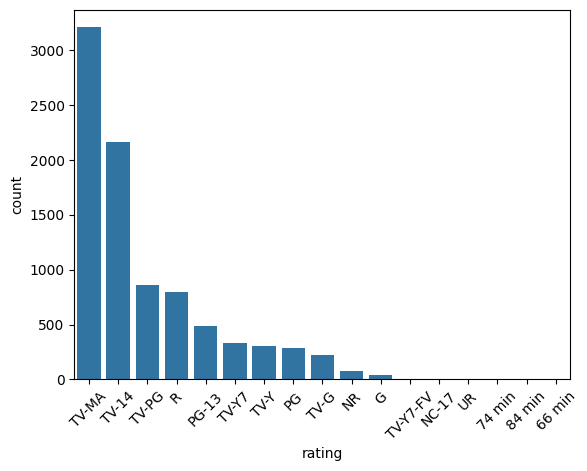

In [60]:
rating_count = df["rating"].value_counts(normalize=True)
print(rating_count)
sns.countplot(x="rating", data=df, order=rating_count.index)
plt.xticks(rotation=45)
plt.show()

### Nhận xét
Nhìn chung, tag TV-MA (không phù hợp cho người dưới 17 tuổi) là tag phổ biến nhất, tiếp theo đó là tag TV-14 (phù hợp cho người 14 tuổi trở lên). 

### Lí do chọn biểu đồ
Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
Ở đây, biến phân loại là rating và số lượng film là rating_count. 

### Listed_in (Thể loại)

In [61]:
#creating a dataframe for tv show
tv_show = (df['type'] == 'TV Show')
tvdf = df[tv_show]
tvdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [62]:
#creating a dataframe for movies
movie = (df['type'] == 'Movie')
movie_df = df[movie]
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [63]:
#movie genres
genres = {}
for genre in movie_df['listed_in']:
    for i in genre.split(','):
        i=i.strip()
        if i not in genres:
            genres[i] = 1
        else:
            genres[i] += 1
        
genre_movie_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
genre_movie_df['Genre'].unique()
genre_movie_df.sort_values(by = 'Number of Movies', ascending = False).head()
top_genres = genre_movie_df.nlargest(5, columns="Number of Movies")

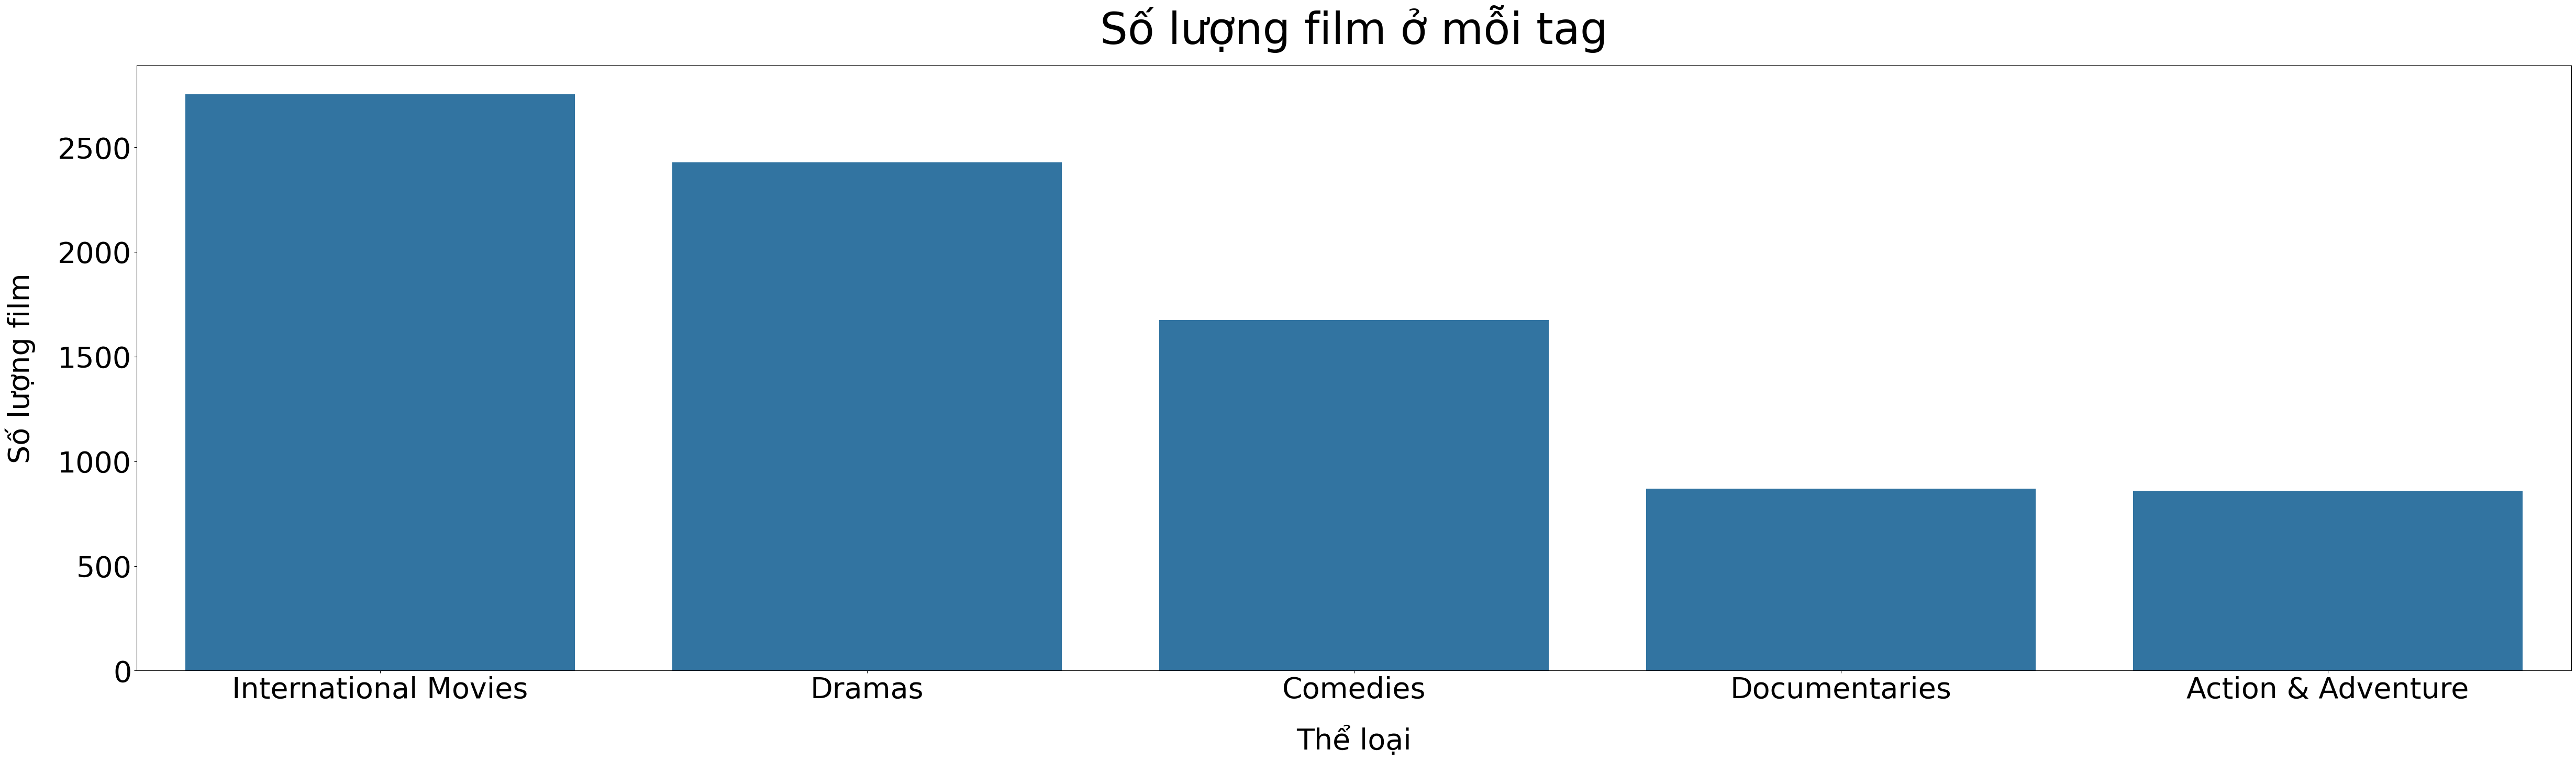

In [69]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre', y='Number of Movies',
            data=top_genres.sort_values(by='Number of Movies', ascending=False))
ax.set_title("Số lượng film ở mỗi tag", fontsize=60, pad=30)
plt.tick_params(labelsize=40) 
ax.set_xlabel('Thể loại', fontsize=40, labelpad=30)  
ax.set_ylabel('Số lượng film', fontsize=40, labelpad=30)
plt.show()

### Nhận xét: 
Có thể dễ dàng nhận thấy, tag phim đa quốc gia là loại phim có số lượng nhiều nhất ở netflix, theo sau đó là phim truyện. Các thể loại khác kém phổ biến hơn là Hài kịch, phim tài liệu và phim phiêu lưu hành động. Phim đa quốc gia ở đây ko phải là một thể loại phim mà hay được xem như một tính chất hơn. Do đó không khó hiểu khi tag đa quốc gia sẽ là nhiều nhất.

### Lí do chọn biểu đồ
Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
Ở đây, biến phân loại là genre và số lượng film là Number of Movies. Chỉ lấy top 5 thể loại có nhiều phim nhất để trực quan hóa.

### Liên hệ giữa Type và Duration